
# Jupyter notebook showing how to use compiled .exe C code in Python for elliptic arcs detection

A Parameterless Line Segment and Elliptical Arc Detector with Enhanced Ellipse Fitting', V. Patraucean, P. Gurdjos, R. Grompone von Gioi, ECCV2012.

by Rayisa Moiseyenko, Andreas Baum, Thomas Martini Jørgensen 

In [1]:
import numpy as np
import os
import cv2
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

## Read an image 

Algorithm is resolution dependent as stated in the article. Therefore some preprocessing is might be needed before detection.

Examples:

name='orig.png' - original file

name='mean.jpg' - same file after background subtraction and upscaling with factor 3

In [2]:
name='mean.jpg' 

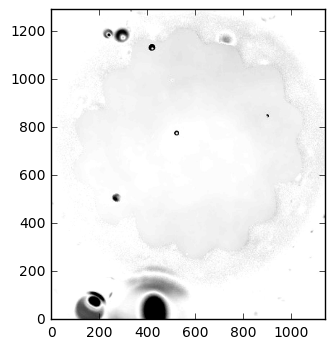

In [3]:
im = cv2.imread(name,0)
plt.imshow(im, cmap = 'gray',origin='lower')
plt.show()

Convert .jpg to .pgm format accepted by circle detector program.
Creates a loss of resolution by factor 2

In [4]:
cv2.imwrite('image.pgm',im)            

True

## Detect circles

Run detect circles for each frame results are printed in ellipses file
If file already exists in the folder to remove it and start detection

In [5]:

if(os.path.isfile('ellipses.txt')):
    os.remove("ellipses.txt")
os.system("elsd.exe "+"image.pgm")


0

Read a file containing detected circles

In [6]:
dist='ellipses.txt'
data = pd.read_csv(dist, sep=" ", header = None)


data.columns = ["uCenter", "vCenter", "Ru", "Rv","ang_start","ang_end","name"]


Print 5 first detected arc. 

(uCenter,vCenter)    - coordinates of arc origin ,

(Ru, Rv)             - two radii of ellipse,

(ang_start, ang_end) - angle of start and end of arc are respectively; 

 name                - name of image 

In [7]:
data.head()

,uCenter,vCenter,Ru,Rv,ang_start,ang_end,name
0,519.831336,770.279422,10.583797,10.583797,-0.577620,-0.707878,image.pgm
1,417.422795,1125.431469,14.536390,13.793922,-0.828067,-0.927094,image.pgm
2,896.412821,841.420589,7.313975,6.135786,4.433328,9.214852,image.pgm
3,239.506110,1177.349930,6.778064,6.778064,0.807257,6.869608,image.pgm
4,516.455217,769.006288,7.767759,7.767759,5.697348,7.097467,image.pgm


## Plot detected circles

Print the detected circles on top of image

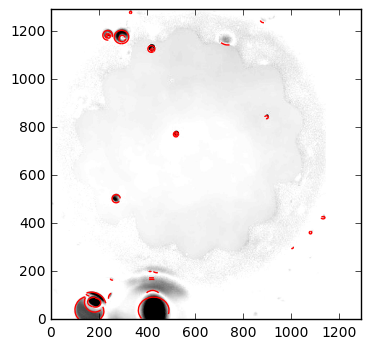

In [8]:
fig, ax = plt.subplots() 
im = cv2.imread(name,0)
plt.imshow(im, cmap = 'gray')
R=max(im.shape[0],im.shape[1])
ax.set_xlim(0, R)
ax.set_ylim(0, R)

for i in range(len(data)-1):
    circ=data.iloc[[i]]
    c=circ.as_matrix()
    x, y = c.item((0)), c.item((1))
    #correcting radius value due to loss during conversion to .pgm
    a, b = c.item((2))*2, c.item((3))*2
    ax.add_patch(Arc((circ.uCenter, circ.vCenter), a, b,
                 theta1=c.item((4))*180/np.pi, theta2=c.item((5))*180/np.pi, edgecolor='r'))

plt.show()  

Filtering of detected circles can be implemented depending on the application. For example, to avoid double detection, threshold based on radius value etc.
